# Publish Me: Release Assistant
The purpose of this project is to take published books sales data, then to sort it by sub-genre to allow self-publish authors to determine the highest probability for successful sales of their novel based on genre and sub-genre. The long term goal would be to design a web based dashboard that will allow the author search or filter for their sub-genre for sales numbers and to cross check with planned release dates of similar books that will be published by traditional publishing houses to prevent lower sales by releasing self-published books at or around the same time of more well known or popular authors.

### Dataset locations: 
Books_Data_Clean.csv (https://www.kaggle.com/datasets/thedevastator/books-sales-and-ratings)

book_details.csv (https://www.kaggle.com/datasets/evilspirit05/comprehensive-goodreads-book-dataset?resource=download)   

In [69]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import colormaps
import numpy as np
from collections import Counter
#import nltk
# nltk.download('stopwords')
import string
import sqlite3
from matplotlib.ticker import FuncFormatter
import seaborn as sn


### Data Collection and Loading: 

#### Load Data: I used Pandas to load the datasets via a CSV file. 

#### Initial Check: Please see below for the initial disply of the dataset. Then the first few rows and basic information about the dataset, noting column names, types, and missing values.

#### Selection Options:

⁜ From 'Books_Data_Clean', I dropped columns that were not needed for the analysis (index, language_code, Author_Rating, Book_average_rating, Book_ratings_count). 

⁜ The columns that I focused in 'Books_Data_Clean' were Book_Name, Author, genre, gross_sales, publisher_revenue, sale_price, sales_rank, Pulisher_ and units_sold.  

⁜ Prior to joining the data sets, I changed strings to upper and replaced special characters with ' ' to facilitate easier joining of the datasets. 

⁜ In order to differentiate genre into sub-genre, I joined 'Books_Data_Clean' with 'book_details' by book Title. 

⁜ Any books listed in the combined dataset with null values in author were dropped to make the dataset more concise with the sales data. 

In [4]:
BS = pd.read_csv("Books_Data_Clean.csv")

BS

,index,Publishing Year,Book Name,Author,language_code,Author_Rating,Book_average_rating,Book_ratings_count,genre,gross sales,publisher revenue,sale price,sales rank,Publisher,units sold
0,0,1975.0,Beowulf,"Unknown, Seamus Heaney",en-US,Novice,3.42,155903,genre fiction,34160.00,20496.000,4.88,1,HarperCollins Publishers,7000
1,1,1987.0,Batman: Year One,"Frank Miller, David Mazzucchelli, Richmond Lew...",eng,Intermediate,4.23,145267,genre fiction,12437.50,7462.500,1.99,2,HarperCollins Publishers,6250
2,2,2015.0,Go Set a Watchman,Harper Lee,eng,Novice,3.31,138669,genre fiction,47795.00,28677.000,8.69,3,"Amazon Digital Services, Inc.",5500
3,3,2008.0,When You Are Engulfed in Flames,David Sedaris,en-US,Intermediate,4.04,150898,fiction,41250.00,24750.000,7.50,3,Hachette Book Group,5500
4,4,2011.0,Daughter of Smoke & Bone,Laini Taylor,eng,Intermediate,4.04,198283,genre fiction,37952.50,22771.500,7.99,4,Penguin Group (USA) LLC,4750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1065,1065,2014.0,Gray Mountain,John Grisham,eng,Intermediate,3.52,37379,nonfiction,104.94,62.964,0.99,1268,"Amazon Digital Services, Inc.",106
1066,1066,1989.0,The Power of One,Bryce Courtenay,eng,Excellent,4.34,57312,genre fiction,846.94,508.164,7.99,1270,Random House LLC,106
1067,1067,1930.0,The Maltese Falcon,Dashiell Hammett,eng,Intermediate,3.92,58742,genre fiction,846.94,508.164,7.99,1271,Hachette Book Group,106
1068,1068,2011.0,Night Road,Kristin Hannah,en-US,Excellent,4.17,58028,genre fiction,104.94,62.964,0.99,1272,"Amazon Digital Services, Inc.",106


In [5]:
BS.describe()

,index,Publishing Year,Book_average_rating,Book_ratings_count,gross sales,publisher revenue,sale price,sales rank,units sold
count,1070.000000,1069.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000
mean,534.500000,1971.377923,4.007000,94909.913084,1856.622944,843.281030,4.869561,611.652336,9676.980374
std,309.026698,185.080257,0.247244,31513.242518,3936.924240,2257.596743,3.559919,369.849830,15370.571306
min,0.000000,-560.000000,2.970000,27308.000000,104.940000,0.000000,0.990000,1.000000,106.000000
25%,267.250000,1985.000000,3.850000,70398.000000,372.465000,0.000000,1.990000,287.500000,551.250000
50%,534.500000,2003.000000,4.015000,89309.000000,809.745000,273.078000,3.990000,595.500000,3924.000000
75%,801.750000,2010.000000,4.170000,113906.500000,1487.957500,721.180500,6.990000,932.500000,5312.250000
max,1069.000000,2016.000000,4.770000,206792.000000,47795.000000,28677.000000,33.860000,1273.000000,61560.000000


In [6]:
BS = BS.drop(['index','language_code','Author_Rating','Book_average_rating','Book_ratings_count'], axis=1)


In [7]:
BS.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1070 entries, 0 to 1069
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Publishing Year    1069 non-null   float64
 1   Book Name          1047 non-null   object 
 2   Author             1070 non-null   object 
 3   genre              1070 non-null   object 
 4   gross sales        1070 non-null   float64
 5   publisher revenue  1070 non-null   float64
 6   sale price         1070 non-null   float64
 7   sales rank         1070 non-null   int64  
 8   Publisher          1070 non-null   object 
 9   units sold         1070 non-null   int64  
dtypes: float64(4), int64(2), object(4)
memory usage: 83.7+ KB


In [8]:
# Replace spaces with underscores in column names
BS.columns = BS.columns.str.replace(' ', '_')
BS.head()

,Publishing_Year,Book_Name,Author,genre,gross_sales,publisher_revenue,sale_price,sales_rank,Publisher_,units_sold
0,1975.0,Beowulf,"Unknown, Seamus Heaney",genre fiction,34160.0,20496.0,4.88,1,HarperCollins Publishers,7000
1,1987.0,Batman: Year One,"Frank Miller, David Mazzucchelli, Richmond Lew...",genre fiction,12437.5,7462.5,1.99,2,HarperCollins Publishers,6250
2,2015.0,Go Set a Watchman,Harper Lee,genre fiction,47795.0,28677.0,8.69,3,"Amazon Digital Services, Inc.",5500
3,2008.0,When You Are Engulfed in Flames,David Sedaris,fiction,41250.0,24750.0,7.50,3,Hachette Book Group,5500
4,2011.0,Daughter of Smoke & Bone,Laini Taylor,genre fiction,37952.5,22771.5,7.99,4,Penguin Group (USA) LLC,4750


In [9]:
# change string to upper single column
#BS['Book Name'] = BS['Book Name'].str.upper() 

# change string to upper for multiple columns
BS = BS.assign(Book_Name=BS['Book_Name'].str.upper(), 
               Author=BS['Author'].str.upper(),
               genre=BS['genre'].str.upper(),
               Publisher_=BS['Publisher_'].str.upper())
BS.head(3)

,Publishing_Year,Book_Name,Author,genre,gross_sales,publisher_revenue,sale_price,sales_rank,Publisher_,units_sold
0,1975.0,BEOWULF,"UNKNOWN, SEAMUS HEANEY",GENRE FICTION,34160.0,20496.0,4.88,1,HARPERCOLLINS PUBLISHERS,7000
1,1987.0,BATMAN: YEAR ONE,"FRANK MILLER, DAVID MAZZUCCHELLI, RICHMOND LEW...",GENRE FICTION,12437.5,7462.5,1.99,2,HARPERCOLLINS PUBLISHERS,6250
2,2015.0,GO SET A WATCHMAN,HARPER LEE,GENRE FICTION,47795.0,28677.0,8.69,3,"AMAZON DIGITAL SERVICES, INC.",5500


In [10]:
#remove special characters from single column
BS['Book_Name'] = BS['Book_Name'].str.replace('\W', ' ', regex=True)
BS['Author'] = BS['Author'].str.replace('\W', ' ', regex=True)
BS['genre'] = BS['genre'].str.replace('\W', ' ', regex=True)
BS['Publisher_'] = BS['Publisher_'].str.replace('\W', ' ', regex=True)
# replace special character with ' ' for all columns
#df = df.replace(r'[^0-9a-zA-Z ]', '', regex=True).replace("'", '')
BS.head(3)

,Publishing_Year,Book_Name,Author,genre,gross_sales,publisher_revenue,sale_price,sales_rank,Publisher_,units_sold
0,1975.0,BEOWULF,UNKNOWN SEAMUS HEANEY,GENRE FICTION,34160.0,20496.0,4.88,1,HARPERCOLLINS PUBLISHERS,7000
1,1987.0,BATMAN YEAR ONE,FRANK MILLER DAVID MAZZUCCHELLI RICHMOND LEW...,GENRE FICTION,12437.5,7462.5,1.99,2,HARPERCOLLINS PUBLISHERS,6250
2,2015.0,GO SET A WATCHMAN,HARPER LEE,GENRE FICTION,47795.0,28677.0,8.69,3,AMAZON DIGITAL SERVICES INC,5500


In [11]:
#replace genre fiction with fiction
BS['genre'] = BS['genre'].replace('GENRE FICTION','FICTION')
BS.head(3)

,Publishing_Year,Book_Name,Author,genre,gross_sales,publisher_revenue,sale_price,sales_rank,Publisher_,units_sold
0,1975.0,BEOWULF,UNKNOWN SEAMUS HEANEY,FICTION,34160.0,20496.0,4.88,1,HARPERCOLLINS PUBLISHERS,7000
1,1987.0,BATMAN YEAR ONE,FRANK MILLER DAVID MAZZUCCHELLI RICHMOND LEW...,FICTION,12437.5,7462.5,1.99,2,HARPERCOLLINS PUBLISHERS,6250
2,2015.0,GO SET A WATCHMAN,HARPER LEE,FICTION,47795.0,28677.0,8.69,3,AMAZON DIGITAL SERVICES INC,5500


In [12]:
Book_Details = pd.read_csv ("book_details.csv")
Book_Details

,title,url,description,genres
0,To Kill a Mockingbird,https://www.goodreads.com/book/show/2657.To_Ki...,The unforgettable novel of a childhood in a sl...,"['Classics', 'Fiction', 'Historical Fiction', ..."
1,Harry Potter and the Philosopher’s Stone,https://www.goodreads.com/book/show/72193.Harr...,Harry Potter thinks he is an ordinary boy - un...,"['Fantasy', 'Fiction', 'Young Adult', 'Magic',..."
2,Pride and Prejudice,https://www.goodreads.com/book/show/1885.Pride...,Alternate cover edition of ISBN 9780679783268S...,"['Classics', 'Fiction', 'Romance', 'Historical..."
3,The Diary of a Young Girl,https://www.goodreads.com/book/show/48855.The_...,Discovered in the attic in which she spent the...,"['Classics', 'Nonfiction', 'History', 'Biograp..."
4,Animal Farm,https://www.goodreads.com/book/show/170448.Ani...,Librarian's note: There is an Alternate Cover ...,"['Classics', 'Fiction', 'Dystopia', 'Fantasy',..."
...,...,...,...,...
6308,The Blank Slate: The Modern Denial of Human Na...,https://www.goodreads.com/book/show/5752.The_B...,"In The Blank Slate, Steven Pinker explores the...","['Psychology', 'Science', 'Nonfiction', 'Philo..."
6309,La leyenda del Rey Errante,https://www.goodreads.com/book/show/1146745.La...,"Cuenta la historia de Walid, un príncipe árabe...","['Fantasy', 'Historical Fiction', 'Fiction', '..."
6310,"This Way for the Gas, Ladies and Gentlemen",https://www.goodreads.com/book/show/228244.Thi...,Tadeusz Borowski’s concentration camp stories ...,"['History', 'Short Stories', 'Holocaust', 'Non..."
6311,The Warded Man,https://www.goodreads.com/book/show/3428935-th...,"As darkness falls after sunset, the corelings ...","['Fantasy', 'Fiction', 'Epic Fantasy', 'High F..."


In [13]:
#Genres = Book_Details['genres'].value_counts() 
Book_Details.groupby('genres').size().get('value', 0) 
#Genres1 = Counter(Book_Details['genres'])
#Genres1

0

In [14]:
Book_Details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6313 entries, 0 to 6312
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   title        6313 non-null   object
 1   url          6313 non-null   object
 2   description  6274 non-null   object
 3   genres       6313 non-null   object
dtypes: object(4)
memory usage: 197.4+ KB


In [15]:
Book_Details.describe()

,title,url,description,genres
count,6313,6313,6274,6313
unique,6183,6313,6252,5889
top,The Hunger Games,https://www.goodreads.com/book/show/18361450-r...,Lost in Yaba is a true story about an expat wh...,[]
freq,3,1,2,163


In [16]:
# change string to upper for title column
Book_Details = Book_Details.assign(title=Book_Details['title'].str.upper()) 
#remove special characters from title column
Book_Details['title'] = Book_Details['title'].str.replace('\W', ' ', regex=True)
#split genres column into multiple sub-genre columns 
Book_Details[['Sub_Genre_1', 'Sub_Genre_2', 'Sub_Genre_3','Sub_Genre_4','Sub_Genre_5','Sub_Genre_6','Sub_Genre_7','Sub_Genre_8','Sub_Genre_9','Sub_Genre_10']] = Book_Details['genres'].str.split(',', expand=True)
Book_Details.head(3)

,title,url,description,genres,Sub_Genre_1,Sub_Genre_2,Sub_Genre_3,Sub_Genre_4,Sub_Genre_5,Sub_Genre_6,Sub_Genre_7,Sub_Genre_8,Sub_Genre_9,Sub_Genre_10
0,TO KILL A MOCKINGBIRD,https://www.goodreads.com/book/show/2657.To_Ki...,The unforgettable novel of a childhood in a sl...,"['Classics', 'Fiction', 'Historical Fiction', ...",['Classics','Fiction','Historical Fiction','School','Literature','Young Adult','Historical','Read For School','Novels','High School']
1,HARRY POTTER AND THE PHILOSOPHER S STONE,https://www.goodreads.com/book/show/72193.Harr...,Harry Potter thinks he is an ordinary boy - un...,"['Fantasy', 'Fiction', 'Young Adult', 'Magic',...",['Fantasy','Fiction','Young Adult','Magic','Childrens','Middle Grade','Classics','Adventure','Audiobook','Science Fiction Fantasy']
2,PRIDE AND PREJUDICE,https://www.goodreads.com/book/show/1885.Pride...,Alternate cover edition of ISBN 9780679783268S...,"['Classics', 'Fiction', 'Romance', 'Historical...",['Classics','Fiction','Romance','Historical Fiction','Literature','Historical','Audiobook','Novels','Historical Romance','Adult']


In [17]:
#drop genres then remove all special characters ([],'') from Sub_Genre columns and change strings to CAPS
Book_Details = Book_Details.drop('genres', axis=1)

Book_Details = Book_Details.assign(Sub_Genre_1=Book_Details['Sub_Genre_1'].str.upper(), 
               Sub_Genre_2=Book_Details['Sub_Genre_2'].str.upper(),
               Sub_Genre_3=Book_Details['Sub_Genre_3'].str.upper(),
               Sub_Genre_4=Book_Details['Sub_Genre_4'].str.upper(),
               Sub_Genre_5=Book_Details['Sub_Genre_5'].str.upper(),
               Sub_Genre_6=Book_Details['Sub_Genre_6'].str.upper(),
               Sub_Genre_7=Book_Details['Sub_Genre_7'].str.upper(),
               Sub_Genre_8=Book_Details['Sub_Genre_8'].str.upper(),
               Sub_Genre_9=Book_Details['Sub_Genre_9'].str.upper(),
               Sub_Genre_10=Book_Details['Sub_Genre_10'].str.upper())

#Book_Details['Sub_Genre_1'] = Book_Details['Sub_Genre_1'].str.replace("\[",'',regex=True)
#Book_Details['Sub_Genre_10'] = Book_Details['Sub_Genre_10'].str.replace("\]",'',regex=True)

Book_Details['Sub_Genre_1'] = Book_Details['Sub_Genre_1'].str.replace("\W", '', regex=True)
Book_Details['Sub_Genre_2'] = Book_Details['Sub_Genre_2'].str.replace("\W", '', regex=True)
Book_Details['Sub_Genre_3'] = Book_Details['Sub_Genre_3'].str.replace("\W", '', regex=True)
Book_Details['Sub_Genre_4'] = Book_Details['Sub_Genre_4'].str.replace("\W", '', regex=True)
Book_Details['Sub_Genre_5'] = Book_Details['Sub_Genre_5'].str.replace("\W", '', regex=True)
Book_Details['Sub_Genre_6'] = Book_Details['Sub_Genre_6'].str.replace("\W", '', regex=True)
Book_Details['Sub_Genre_7'] = Book_Details['Sub_Genre_7'].str.replace("\W", '', regex=True)
Book_Details['Sub_Genre_8'] = Book_Details['Sub_Genre_8'].str.replace("\W", '', regex=True)
Book_Details['Sub_Genre_9'] = Book_Details['Sub_Genre_9'].str.replace("\W", '', regex=True)
Book_Details['Sub_Genre_10'] = Book_Details['Sub_Genre_10'].str.replace("\W", '', regex=True)



In [18]:

Book_Details.head(3)

,title,url,description,Sub_Genre_1,Sub_Genre_2,Sub_Genre_3,Sub_Genre_4,Sub_Genre_5,Sub_Genre_6,Sub_Genre_7,Sub_Genre_8,Sub_Genre_9,Sub_Genre_10
0,TO KILL A MOCKINGBIRD,https://www.goodreads.com/book/show/2657.To_Ki...,The unforgettable novel of a childhood in a sl...,CLASSICS,FICTION,HISTORICALFICTION,SCHOOL,LITERATURE,YOUNGADULT,HISTORICAL,READFORSCHOOL,NOVELS,HIGHSCHOOL
1,HARRY POTTER AND THE PHILOSOPHER S STONE,https://www.goodreads.com/book/show/72193.Harr...,Harry Potter thinks he is an ordinary boy - un...,FANTASY,FICTION,YOUNGADULT,MAGIC,CHILDRENS,MIDDLEGRADE,CLASSICS,ADVENTURE,AUDIOBOOK,SCIENCEFICTIONFANTASY
2,PRIDE AND PREJUDICE,https://www.goodreads.com/book/show/1885.Pride...,Alternate cover edition of ISBN 9780679783268S...,CLASSICS,FICTION,ROMANCE,HISTORICALFICTION,LITERATURE,HISTORICAL,AUDIOBOOK,NOVELS,HISTORICALROMANCE,ADULT


In [19]:
# Renaming columns
Book_Details.rename(columns={'title': 'Book_Name'}, inplace=True)
Book_Details.head(2)

,Book_Name,url,description,Sub_Genre_1,Sub_Genre_2,Sub_Genre_3,Sub_Genre_4,Sub_Genre_5,Sub_Genre_6,Sub_Genre_7,Sub_Genre_8,Sub_Genre_9,Sub_Genre_10
0,TO KILL A MOCKINGBIRD,https://www.goodreads.com/book/show/2657.To_Ki...,The unforgettable novel of a childhood in a sl...,CLASSICS,FICTION,HISTORICALFICTION,SCHOOL,LITERATURE,YOUNGADULT,HISTORICAL,READFORSCHOOL,NOVELS,HIGHSCHOOL
1,HARRY POTTER AND THE PHILOSOPHER S STONE,https://www.goodreads.com/book/show/72193.Harr...,Harry Potter thinks he is an ordinary boy - un...,FANTASY,FICTION,YOUNGADULT,MAGIC,CHILDRENS,MIDDLEGRADE,CLASSICS,ADVENTURE,AUDIOBOOK,SCIENCEFICTIONFANTASY


In [20]:
#Join datasets via title
# using .merge() function
Full_Book_Details = pd.merge(Book_Details, BS, on='Book_Name')
Full_Book_Details.head(4)


,Book_Name,url,description,Sub_Genre_1,Sub_Genre_2,Sub_Genre_3,Sub_Genre_4,Sub_Genre_5,Sub_Genre_6,Sub_Genre_7,...,Sub_Genre_10,Publishing_Year,Author,genre,gross_sales,publisher_revenue,sale_price,sales_rank,Publisher_,units_sold
0,THE LITTLE HOUSE COLLECTION,https://www.goodreads.com/book/show/114345.The...,This nine-book paperback box set of the classi...,CLASSICS,HISTORICALFICTION,CHILDRENS,FICTION,YOUNGADULT,HISTORICAL,MIDDLEGRADE,...,KIDS,1953.0,LAURA INGALLS WILDER GARTH WILLIAMS,FICTION,5195.91,3117.546,11.47,228,RANDOM HOUSE LLC,453
1,THE VELVETEEN RABBIT,https://www.goodreads.com/book/show/144974.The...,"Nursery magic is very strange and wonderful, a...",CLASSICS,CHILDRENS,FICTION,PICTUREBOOKS,FANTASY,ANIMALS,YOUNGADULT,...,MIDDLEGRADE,1922.0,MARGERY WILLIAMS BIANCO WILLIAM NICHOLSON,FICTION,21797.82,13078.692,6.54,15,RANDOM HOUSE LLC,3333
2,LOVE YOU FOREVER,https://www.goodreads.com/book/show/310259.Lov...,An extraordinarily different story by Robert M...,PICTUREBOOKS,CHILDRENS,FICTION,CLASSICS,FAMILY,LOVE,KIDS,...,JUVENILE,1986.0,ROBERT MUNSCH SHEILA MCGRAW,FICTION,1309.77,785.862,0.99,79,AMAZON DIGITAL SERVICES INC,1323
3,JONATHAN LIVINGSTON SEAGULL,https://www.goodreads.com/book/show/71728.Jona...,This is a story for people who follow their he...,FICTION,CLASSICS,PHILOSOPHY,FANTASY,SPIRITUALITY,INSPIRATIONAL,SELFHELP,...,ANIMALS,1970.0,RICHARD BACH RUSSELL MUNSON,FICTION,6751.47,0.000,4.99,77,AMAZON DIGITAL SERVICES INC,1353


In [21]:
#drop genre, sales_price, sales_rank, url
Full_Book_Details = Full_Book_Details.drop(['url','genre','sales_rank','description'], axis=1)
Full_Book_Details.head(4)

,Book_Name,Sub_Genre_1,Sub_Genre_2,Sub_Genre_3,Sub_Genre_4,Sub_Genre_5,Sub_Genre_6,Sub_Genre_7,Sub_Genre_8,Sub_Genre_9,Sub_Genre_10,Publishing_Year,Author,gross_sales,publisher_revenue,sale_price,Publisher_,units_sold
0,THE LITTLE HOUSE COLLECTION,CLASSICS,HISTORICALFICTION,CHILDRENS,FICTION,YOUNGADULT,HISTORICAL,MIDDLEGRADE,JUVENILE,LITERATURE,KIDS,1953.0,LAURA INGALLS WILDER GARTH WILLIAMS,5195.91,3117.546,11.47,RANDOM HOUSE LLC,453
1,THE VELVETEEN RABBIT,CLASSICS,CHILDRENS,FICTION,PICTUREBOOKS,FANTASY,ANIMALS,YOUNGADULT,JUVENILE,SHORTSTORIES,MIDDLEGRADE,1922.0,MARGERY WILLIAMS BIANCO WILLIAM NICHOLSON,21797.82,13078.692,6.54,RANDOM HOUSE LLC,3333
2,LOVE YOU FOREVER,PICTUREBOOKS,CHILDRENS,FICTION,CLASSICS,FAMILY,LOVE,KIDS,REALISTICFICTION,CANADA,JUVENILE,1986.0,ROBERT MUNSCH SHEILA MCGRAW,1309.77,785.862,0.99,AMAZON DIGITAL SERVICES INC,1323
3,JONATHAN LIVINGSTON SEAGULL,FICTION,CLASSICS,PHILOSOPHY,FANTASY,SPIRITUALITY,INSPIRATIONAL,SELFHELP,LITERATURE,NOVELS,ANIMALS,1970.0,RICHARD BACH RUSSELL MUNSON,6751.47,0.000,4.99,AMAZON DIGITAL SERVICES INC,1353


In [22]:
# run columns for value count words to get a master list of sub-genres
Genres1 = Full_Book_Details['Sub_Genre_1'].value_counts().to_dict()
Genres2 = Full_Book_Details['Sub_Genre_2'].value_counts().to_dict()
Genres3 = Full_Book_Details['Sub_Genre_3'].value_counts().to_dict()
Genres4 = Full_Book_Details['Sub_Genre_4'].value_counts().to_dict()
Genres5 = Full_Book_Details['Sub_Genre_5'].value_counts().to_dict()
Genres6 = Full_Book_Details['Sub_Genre_6'].value_counts().to_dict()
Genres7 = Full_Book_Details['Sub_Genre_7'].value_counts().to_dict()
Genres8 = Full_Book_Details['Sub_Genre_8'].value_counts().to_dict()
Genres9 = Full_Book_Details['Sub_Genre_9'].value_counts().to_dict()
Genres10 = Full_Book_Details['Sub_Genre_10'].value_counts().to_dict()

Genres1

{'FICTION': 160,
 'FANTASY': 111,
 'NONFICTION': 60,
 'YOUNGADULT': 59,
 'CLASSICS': 56,
 'HORROR': 44,
 'HISTORICALFICTION': 31,
 'SCIENCEFICTION': 30,
 'ROMANCE': 29,
 'MYSTERY': 26,
 'PICTUREBOOKS': 11,
 'CHILDRENS': 10,
 'HISTORY': 9,
 'HUMOR': 8,
 'THRILLER': 7,
 'COMICS': 4,
 'GRAPHICNOVELS': 3,
 'CHICKLIT': 3,
 'SCIENCE': 3,
 'CHRISTIAN': 3,
 'BIOGRAPHY': 2,
 'PLAYS': 2,
 'POETRY': 2,
 'SHORTSTORIES': 2,
 'DYSTOPIA': 2,
 'URBANFANTASY': 2,
 'BUSINESS': 2,
 'PSYCHOLOGY': 2,
 'SPIRITUALITY': 1,
 'COOKBOOKS': 1,
 'TRUECRIME': 1,
 'PHILOSOPHY': 1,
 'SELFHELP': 1,
 'REALISTICFICTION': 1,
 'CONTEMPORARY': 1,
 'TRAVEL': 1,
 'ZOMBIES': 1,
 'ART': 1,
 'VAMPIRES': 1,
 'PARANORMAL': 1}

In [23]:
# map rows for the genres, use for loop for fiction and nonfiction to move to a new master genre column

#Function to determine the master genre
# def determine_master_genre(row):
#     for col in row:
#         if col == 'FICTION':
#             return 'FICTION'
#         elif col == 'NONFICTION':
#             return 'NONFICTION'
#     else: return 'OTHER'


# Function to determine the genre
def determine_master_genre(row):
    if 'FICTION' in row.values:
        return 'FICTION'
    elif 'NONFICTION' in row.values:
        return 'NONFICTION'
    else:
        return 'OTHER'

# Apply the function to each row
Full_Book_Details['Master_Genre'] = Full_Book_Details.apply(determine_master_genre, axis=1)

Full_Book_Details
# map rows for the next largest genre, using for loop to move those to a new sub-genre column

,Book_Name,Sub_Genre_1,Sub_Genre_2,Sub_Genre_3,Sub_Genre_4,Sub_Genre_5,Sub_Genre_6,Sub_Genre_7,Sub_Genre_8,Sub_Genre_9,Sub_Genre_10,Publishing_Year,Author,gross_sales,publisher_revenue,sale_price,Publisher_,units_sold,Master_Genre
0,THE LITTLE HOUSE COLLECTION,CLASSICS,HISTORICALFICTION,CHILDRENS,FICTION,YOUNGADULT,HISTORICAL,MIDDLEGRADE,JUVENILE,LITERATURE,KIDS,1953.0,LAURA INGALLS WILDER GARTH WILLIAMS,5195.91,3117.546,11.47,RANDOM HOUSE LLC,453,FICTION
1,THE VELVETEEN RABBIT,CLASSICS,CHILDRENS,FICTION,PICTUREBOOKS,FANTASY,ANIMALS,YOUNGADULT,JUVENILE,SHORTSTORIES,MIDDLEGRADE,1922.0,MARGERY WILLIAMS BIANCO WILLIAM NICHOLSON,21797.82,13078.692,6.54,RANDOM HOUSE LLC,3333,FICTION
2,LOVE YOU FOREVER,PICTUREBOOKS,CHILDRENS,FICTION,CLASSICS,FAMILY,LOVE,KIDS,REALISTICFICTION,CANADA,JUVENILE,1986.0,ROBERT MUNSCH SHEILA MCGRAW,1309.77,785.862,0.99,AMAZON DIGITAL SERVICES INC,1323,FICTION
3,JONATHAN LIVINGSTON SEAGULL,FICTION,CLASSICS,PHILOSOPHY,FANTASY,SPIRITUALITY,INSPIRATIONAL,SELFHELP,LITERATURE,NOVELS,ANIMALS,1970.0,RICHARD BACH RUSSELL MUNSON,6751.47,0.000,4.99,AMAZON DIGITAL SERVICES INC,1353,FICTION
4,THE COMPLETE SHERLOCK HOLMES,CLASSICS,MYSTERY,FICTION,CRIME,SHORTSTORIES,DETECTIVE,LITERATURE,AUDIOBOOK,MYSTERYTHRILLER,HISTORICALFICTION,1894.0,ARTHUR CONAN DOYLE,3180.02,1908.012,7.99,PENGUIN GROUP USA LLC,398,FICTION
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
690,THE AMITYVILLE HORROR,HORROR,FICTION,PARANORMAL,THRILLER,CLASSICS,AUDIOBOOK,SUPERNATURAL,TRUECRIME,MYSTERY,GHOSTS,1977.0,JAY ANSON,1191.26,714.756,8.89,HACHETTE BOOK GROUP,52056,FICTION
691,THE BONE CLOCKS,FICTION,FANTASY,SCIENCEFICTION,LITERARYFICTION,MAGICALREALISM,CONTEMPORARY,MYSTERY,DYSTOPIA,AUDIOBOOK,ADULT,2014.0,DAVID MITCHELL,781.96,469.176,6.92,RANDOM HOUSE LLC,2862,FICTION
692,RULES OF CIVILITY,FICTION,HISTORICALFICTION,HISTORICAL,NEWYORK,LITERARYFICTION,AUDIOBOOK,BOOKCLUB,ADULTFICTION,NOVELS,ADULT,2011.0,AMOR TOWLES,712.81,427.686,5.99,PENGUIN GROUP USA LLC,40824,FICTION
693,THE BLACK DAHLIA,MYSTERY,FICTION,CRIME,NOIR,HISTORICALFICTION,TRUECRIME,THRILLER,MYSTERYTHRILLER,DETECTIVE,HISTORICAL,1987.0,JAMES ELLROY,1088.91,653.346,9.99,RANDOM HOUSE LLC,4280,FICTION


In [24]:
Master_Genre1 = Full_Book_Details['Master_Genre'].value_counts() 
Master_Genre1

Master_Genre
FICTION       593
NONFICTION     96
OTHER           6
Name: count, dtype: int64

In [25]:
#identify OTHER master genres in order to categorize the outliers. 
specific_value = 'OTHER'
rows_with_value = Full_Book_Details[Full_Book_Details['Master_Genre']==specific_value]
rows_with_value

,Book_Name,Sub_Genre_1,Sub_Genre_2,Sub_Genre_3,Sub_Genre_4,Sub_Genre_5,Sub_Genre_6,Sub_Genre_7,Sub_Genre_8,Sub_Genre_9,Sub_Genre_10,Publishing_Year,Author,gross_sales,publisher_revenue,sale_price,Publisher_,units_sold,Master_Genre
363,HEX HALL,YOUNGADULT,FANTASY,PARANORMAL,MAGIC,ROMANCE,VAMPIRES,WITCHES,SUPERNATURAL,URBANFANTASY,DEMONS,2010.0,RACHEL HAWKINS,526.68,0.000,3.99,AMAZON DIGITAL SERVICES INC,50544,OTHER
547,TORMENT,VAMPIRES,PARANORMAL,HORROR,YOUNGADULT,FANTASY,ROMANCE,WITCHES,DEMONS,ANGELS,PARANORMALROMANCE,2010.0,LAUREN KATE,5705.70,0.000,3.99,AMAZON DIGITAL SERVICES INC,1430,OTHER
609,FOREVER,YOUNGADULT,ROMANCE,CONTEMPORARY,AMISH,CONTEMPORARYROMANCE,TEEN,YOUNGADULTCONTEMPORARY,REALISTICFICTION,NEWADULT,LOVE,2011.0,MAGGIE STIEFVATER,827.86,496.716,7.81,PENGUIN GROUP USA LLC,106,OTHER
611,BEHIND CLOSED DOORS,ROMANCE,CONTEMPORARYROMANCE,CONTEMPORARY,SUSPENSE,MYSTERY,ADULT,ROMANTICSUSPENSE,AMAZON,MYSTERYTHRILLER,MFROMANCE,2016.0,B A PARIS,919.13,551.478,8.59,PENGUIN GROUP USA LLC,107,OTHER
629,EFFORTLESS,ROMANCE,NEWADULT,CONTEMPORARYROMANCE,CONTEMPORARY,MUSIC,COLLEGE,YOUNGADULT,ADULT,CHICKLIT,EROTICA,2011.0,S C STEPHENS,160.38,96.228,0.99,AMAZON DIGITAL SERVICES INC,4374,OTHER
661,INHERITANCE,FANTASY,AMAZON,None,None,None,None,None,None,None,None,2011.0,CHRISTOPHER PAOLINI,10731.05,6438.630,11.99,RANDOM HOUSE LLC,895,OTHER


In [26]:
#Assessment of all outliers are fiction as a master genre. will replace OTHER with FICTION
Full_Book_Details['Master_Genre'] = Full_Book_Details['Master_Genre'].replace('OTHER','FICTION')

In [27]:
Master_Genre2 = Full_Book_Details['Master_Genre'].value_counts()
Master_Genre2

Master_Genre
FICTION       599
NONFICTION     96
Name: count, dtype: int64

In [28]:
#replace FICTION in Sub_Genre1 to Sub_Genre10 with a null value, and NONFICTION in the same columns with a null value
# exclude_column = Full_Book_Details['Master_Genre']

Full_Book_Details = Full_Book_Details.apply(lambda x:x.replace(['FICTION', 'NONFICTION'], np.nan) if x.name != 'Master_Genre' else x)
Full_Book_Details


,Book_Name,Sub_Genre_1,Sub_Genre_2,Sub_Genre_3,Sub_Genre_4,Sub_Genre_5,Sub_Genre_6,Sub_Genre_7,Sub_Genre_8,Sub_Genre_9,Sub_Genre_10,Publishing_Year,Author,gross_sales,publisher_revenue,sale_price,Publisher_,units_sold,Master_Genre
0,THE LITTLE HOUSE COLLECTION,CLASSICS,HISTORICALFICTION,CHILDRENS,NaN,YOUNGADULT,HISTORICAL,MIDDLEGRADE,JUVENILE,LITERATURE,KIDS,1953.0,LAURA INGALLS WILDER GARTH WILLIAMS,5195.91,3117.546,11.47,RANDOM HOUSE LLC,453,FICTION
1,THE VELVETEEN RABBIT,CLASSICS,CHILDRENS,NaN,PICTUREBOOKS,FANTASY,ANIMALS,YOUNGADULT,JUVENILE,SHORTSTORIES,MIDDLEGRADE,1922.0,MARGERY WILLIAMS BIANCO WILLIAM NICHOLSON,21797.82,13078.692,6.54,RANDOM HOUSE LLC,3333,FICTION
2,LOVE YOU FOREVER,PICTUREBOOKS,CHILDRENS,NaN,CLASSICS,FAMILY,LOVE,KIDS,REALISTICFICTION,CANADA,JUVENILE,1986.0,ROBERT MUNSCH SHEILA MCGRAW,1309.77,785.862,0.99,AMAZON DIGITAL SERVICES INC,1323,FICTION
3,JONATHAN LIVINGSTON SEAGULL,NaN,CLASSICS,PHILOSOPHY,FANTASY,SPIRITUALITY,INSPIRATIONAL,SELFHELP,LITERATURE,NOVELS,ANIMALS,1970.0,RICHARD BACH RUSSELL MUNSON,6751.47,0.000,4.99,AMAZON DIGITAL SERVICES INC,1353,FICTION
4,THE COMPLETE SHERLOCK HOLMES,CLASSICS,MYSTERY,NaN,CRIME,SHORTSTORIES,DETECTIVE,LITERATURE,AUDIOBOOK,MYSTERYTHRILLER,HISTORICALFICTION,1894.0,ARTHUR CONAN DOYLE,3180.02,1908.012,7.99,PENGUIN GROUP USA LLC,398,FICTION
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
690,THE AMITYVILLE HORROR,HORROR,NaN,PARANORMAL,THRILLER,CLASSICS,AUDIOBOOK,SUPERNATURAL,TRUECRIME,MYSTERY,GHOSTS,1977.0,JAY ANSON,1191.26,714.756,8.89,HACHETTE BOOK GROUP,52056,FICTION
691,THE BONE CLOCKS,NaN,FANTASY,SCIENCEFICTION,LITERARYFICTION,MAGICALREALISM,CONTEMPORARY,MYSTERY,DYSTOPIA,AUDIOBOOK,ADULT,2014.0,DAVID MITCHELL,781.96,469.176,6.92,RANDOM HOUSE LLC,2862,FICTION
692,RULES OF CIVILITY,NaN,HISTORICALFICTION,HISTORICAL,NEWYORK,LITERARYFICTION,AUDIOBOOK,BOOKCLUB,ADULTFICTION,NOVELS,ADULT,2011.0,AMOR TOWLES,712.81,427.686,5.99,PENGUIN GROUP USA LLC,40824,FICTION
693,THE BLACK DAHLIA,MYSTERY,NaN,CRIME,NOIR,HISTORICALFICTION,TRUECRIME,THRILLER,MYSTERYTHRILLER,DETECTIVE,HISTORICAL,1987.0,JAMES ELLROY,1088.91,653.346,9.99,RANDOM HOUSE LLC,4280,FICTION


In [29]:
#scrub the rows for the main sub-genres and apply those to a new Master_Sub_Genre column
#FICTION subs: Literary Fiction, Historical Fiction, Science Fiction, Fantasy, Horror, Romance, Mystery, Thriller, Crime, Action, Adventure, Young Adult, Childrens, Contemporary
#NONFICTION subs: Biography, Autobiography, Memoir, True Crime, Self-Help, History, Religion, Science

# Function to determine the master_sub_genre
def determine_master_sub_genre(row):
    if 'SELFHELP' in row.values:
        return 'SELF-HELP'
    elif 'BIOGRAPHY' in row.values:
        return 'BIOGRAPHY'
    elif 'AUTOBIOGRAPHY' in row.values:
        return 'AUTOBIOGRAPHY'
    elif 'MEMOIR' in row.values:
        return 'MEMOIR'
    elif 'COOKBOOKS' in row.values:
        return 'COOKBOOKS'
    elif 'CHILDRENS' in row.values:
        return 'CHILDRENS'
    elif 'SCIENCE' in row.values:
        return 'SCIENCE'
    elif 'HISTORY' in row.values:
        return 'HISTORY'
    elif 'ROMANCE' in row.values:
        return 'ROMANCE'
    elif 'MYSTERY' in row.values:
        return 'MYSTERY'
    elif 'HORROR' in row.values:
        return 'HORROR'
    elif 'SCIENCEFICTION'  in row.values:
        return 'SCIENCE FICTION'
    elif 'LITERARYFICTION' in row.values:
        return 'LITERARY FICTION'
    elif 'HISTORICALFICTION' in row.values:
        return 'HISTORICAL FICTION'
    elif 'FANTASY' in row.values:
        return 'FANTASY'
    elif 'CLASSICS' in row.values:
        return 'CLASSICS'
    elif 'CONTEMPORARY' in row.values:
        return 'CONTEMPORARY'
    elif 'THRILLER' in row.values:
        return 'THRILLER'
    elif 'RELIGION' in row.values:
        return 'RELIGION'
    else:
        return 'OTHER'
    
# Apply the function to each row
Full_Book_Details['Master_Sub_Genre'] = Full_Book_Details.apply(determine_master_sub_genre, axis=1)

Full_Book_Details

,Book_Name,Sub_Genre_1,Sub_Genre_2,Sub_Genre_3,Sub_Genre_4,Sub_Genre_5,Sub_Genre_6,Sub_Genre_7,Sub_Genre_8,Sub_Genre_9,Sub_Genre_10,Publishing_Year,Author,gross_sales,publisher_revenue,sale_price,Publisher_,units_sold,Master_Genre,Master_Sub_Genre
0,THE LITTLE HOUSE COLLECTION,CLASSICS,HISTORICALFICTION,CHILDRENS,NaN,YOUNGADULT,HISTORICAL,MIDDLEGRADE,JUVENILE,LITERATURE,KIDS,1953.0,LAURA INGALLS WILDER GARTH WILLIAMS,5195.91,3117.546,11.47,RANDOM HOUSE LLC,453,FICTION,CHILDRENS
1,THE VELVETEEN RABBIT,CLASSICS,CHILDRENS,NaN,PICTUREBOOKS,FANTASY,ANIMALS,YOUNGADULT,JUVENILE,SHORTSTORIES,MIDDLEGRADE,1922.0,MARGERY WILLIAMS BIANCO WILLIAM NICHOLSON,21797.82,13078.692,6.54,RANDOM HOUSE LLC,3333,FICTION,CHILDRENS
2,LOVE YOU FOREVER,PICTUREBOOKS,CHILDRENS,NaN,CLASSICS,FAMILY,LOVE,KIDS,REALISTICFICTION,CANADA,JUVENILE,1986.0,ROBERT MUNSCH SHEILA MCGRAW,1309.77,785.862,0.99,AMAZON DIGITAL SERVICES INC,1323,FICTION,CHILDRENS
3,JONATHAN LIVINGSTON SEAGULL,NaN,CLASSICS,PHILOSOPHY,FANTASY,SPIRITUALITY,INSPIRATIONAL,SELFHELP,LITERATURE,NOVELS,ANIMALS,1970.0,RICHARD BACH RUSSELL MUNSON,6751.47,0.000,4.99,AMAZON DIGITAL SERVICES INC,1353,FICTION,SELF-HELP
4,THE COMPLETE SHERLOCK HOLMES,CLASSICS,MYSTERY,NaN,CRIME,SHORTSTORIES,DETECTIVE,LITERATURE,AUDIOBOOK,MYSTERYTHRILLER,HISTORICALFICTION,1894.0,ARTHUR CONAN DOYLE,3180.02,1908.012,7.99,PENGUIN GROUP USA LLC,398,FICTION,MYSTERY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
690,THE AMITYVILLE HORROR,HORROR,NaN,PARANORMAL,THRILLER,CLASSICS,AUDIOBOOK,SUPERNATURAL,TRUECRIME,MYSTERY,GHOSTS,1977.0,JAY ANSON,1191.26,714.756,8.89,HACHETTE BOOK GROUP,52056,FICTION,MYSTERY
691,THE BONE CLOCKS,NaN,FANTASY,SCIENCEFICTION,LITERARYFICTION,MAGICALREALISM,CONTEMPORARY,MYSTERY,DYSTOPIA,AUDIOBOOK,ADULT,2014.0,DAVID MITCHELL,781.96,469.176,6.92,RANDOM HOUSE LLC,2862,FICTION,MYSTERY
692,RULES OF CIVILITY,NaN,HISTORICALFICTION,HISTORICAL,NEWYORK,LITERARYFICTION,AUDIOBOOK,BOOKCLUB,ADULTFICTION,NOVELS,ADULT,2011.0,AMOR TOWLES,712.81,427.686,5.99,PENGUIN GROUP USA LLC,40824,FICTION,LITERARY FICTION
693,THE BLACK DAHLIA,MYSTERY,NaN,CRIME,NOIR,HISTORICALFICTION,TRUECRIME,THRILLER,MYSTERYTHRILLER,DETECTIVE,HISTORICAL,1987.0,JAMES ELLROY,1088.91,653.346,9.99,RANDOM HOUSE LLC,4280,FICTION,MYSTERY


In [30]:
Master_Sub_Genre2 = Full_Book_Details['Master_Sub_Genre'].value_counts()
Master_Sub_Genre2

Master_Sub_Genre
ROMANCE               164
MYSTERY               117
CHILDRENS             100
BIOGRAPHY              57
LITERARY FICTION       53
SCIENCE FICTION        43
HORROR                 34
FANTASY                33
HISTORICAL FICTION     32
SELF-HELP              17
CLASSICS               12
SCIENCE                10
HISTORY                 9
CONTEMPORARY            8
MEMOIR                  4
COOKBOOKS               1
RELIGION                1
Name: count, dtype: int64

In [31]:
#identify OTHER master genres in order to categorize the outliers. 
specific_value1 = 'HISTORY'
rows_with_value1 = Full_Book_Details[Full_Book_Details['Master_Sub_Genre']==specific_value1]
rows_with_value1

,Book_Name,Sub_Genre_1,Sub_Genre_2,Sub_Genre_3,Sub_Genre_4,Sub_Genre_5,Sub_Genre_6,Sub_Genre_7,Sub_Genre_8,Sub_Genre_9,Sub_Genre_10,Publishing_Year,Author,gross_sales,publisher_revenue,sale_price,Publisher_,units_sold,Master_Genre,Master_Sub_Genre
70,THE RISE AND FALL OF THE THIRD REICH A HISTOR...,HISTORY,NaN,WORLDWARII,WAR,POLITICS,GERMANY,HISTORICAL,AUDIOBOOK,HOLOCAUST,MILITARYHISTORY,1960.0,WILLIAM L SHIRER,334.88,200.928,2.99,HARPERCOLLINS PUBLISHERS,4440,NONFICTION,HISTORY
212,1776,HISTORY,NaN,AMERICANHISTORY,HISTORICAL,AMERICANREVOLUTION,WAR,AUDIOBOOK,POLITICS,AMERICANREVOLUTIONARYWAR,MILITARYFICTION,2005.0,DAVID MCCULLOUGH,7814.40,4688.640,11.84,RANDOM HOUSE LLC,660,NONFICTION,HISTORY
244,THE BIG SHORT INSIDE THE DOOMSDAY MACHINE,NaN,BUSINESS,ECONOMICS,FINANCE,HISTORY,POLITICS,AUDIOBOOK,MONEY,JOURNALISM,CONTEMPORARY,2009.0,MICHAEL LEWIS,1216.26,729.756,6.99,SIMON AND SCHUSTER DIGITAL SALES INC,4698,NONFICTION,HISTORY
248,THE CASE FOR CHRIST,CHRISTIAN,NaN,RELIGION,CHRISTIANITY,FAITH,THEOLOGY,SPIRITUALITY,CHRISTIANNONFICTION,CHRISTIANLIVING,HISTORY,1988.0,LEE STROBEL,799.11,479.466,6.83,MACMILLAN,31752,NONFICTION,HISTORY
302,AMERICA THE BOOK A CITIZEN S GUIDE TO DEMOC...,HUMOR,NaN,POLITICS,COMEDY,HISTORY,AUDIOBOOK,AMERICANHISTORY,None,None,None,2004.0,JON STEWART BEN KARLIN DAVID JAVERBAUM RICH...,1166.54,699.924,7.99,RANDOM HOUSE LLC,3942,NONFICTION,HISTORY
308,UNDERSTANDING COMICS THE INVISIBLE ART,COMICS,GRAPHICNOVELS,NaN,ART,DESIGN,GRAPHICNOVELSCOMICS,WRITING,REFERENCE,COMICBOOK,HISTORY,1993.0,SCOTT MCCLOUD,129.69,77.814,0.99,AMAZON DIGITAL SERVICES INC,49680,NONFICTION,HISTORY
375,BEHIND THE BEAUTIFUL FOREVERS LIFE DEATH AN...,NaN,INDIA,HISTORY,ASIA,POVERTY,SOCIOLOGY,AUDIOBOOK,TRAVEL,BOOKCLUB,ADULT,2012.0,KATHERINE BOO,934.83,560.898,7.99,RANDOM HOUSE LLC,34344,NONFICTION,HISTORY
506,THE STORY OF ART,ART,NaN,HISTORY,ARTHISTORY,REFERENCE,DESIGN,CLASSICS,ARCHITECTURE,ARTDESIGN,CULTURAL,1950.0,E H GOMBRICH,15058.27,9034.962,8.59,HACHETTE BOOK GROUP,1753,NONFICTION,HISTORY
664,THE FOREVER WAR,NaN,HISTORY,WAR,POLITICS,MILITARYFICTION,JOURNALISM,MILITARYHISTORY,AMERICANHISTORY,AUDIOBOOK,TERRORISM,1974.0,JOE HALDEMAN,214.83,128.898,0.99,AMAZON DIGITAL SERVICES INC,5859,NONFICTION,HISTORY


In [32]:
#replace FICTION sub_genres in Sub_Genre1 to Sub_Genre10 with a null value, and NONFICTION sub_genres in the same columns with a null value
#FICTION subs: Literary Fiction, Historical Fiction, Science Fiction, Fantasy, Horror, Romance, Mystery, Thriller, Crime, Childrens, Contemporary
#NONFICTION subs: Biography, Autobiography, Memoir, Self-Help, History, Religion, Science


#IF Master_Sub_Genre value matches other values in the row, replace other values with null 

# exclude_column = Full_Book_Details['Master_Sub_Genre']
# Full_Book_Details = Full_Book_Details.apply(lambda x:x.replace(['LITERARYFICTION', 'HISTORICALFICTION','SCIENCEFICTION',], np.nan) if x.name != 'Master_Genre' else x)
# Full_Book_Details

def replace_with_nan(Full_Book_Details, target_columns, master_column='Master_Sub_Genre'):
    """
    Replaces values in specified columns with NaN if they match the value in the master column.

    Args:
        Full_Book_Details (pd.Full_Book_Details): The input DataFrame.
        target_columns ('Sub_Genre1', 'Sub_Genre2', 'Sub_Genre3', 'Sub_Genre4', 'Sub_Genre5', 'Sub_Genre6', 'Sub_Genre7', 'Sub_Genre8', 'Sub_Genre9', 'Sub_Genre10'): List of column names to check and replace values in.
        master_column ('Master_Sub_Genre', optional): Name of the column to match against. Defaults to 'master_sub-genre'.

    Returns:
         pd.DataFrame: The modified DataFrame with replaced values.
    """
    for index, row in Full_Book_Details.iterrows():
        master_value = row[master_column]
        for col in target_columns:
            if row[col] == master_value:
                Full_Book_Details.at[index, col] = np.nan
    return Full_Book_Details

Full_Book_Details = pd.DataFrame(Full_Book_Details)

target_cols = ['Sub_Genre_1', 'Sub_Genre_2', 'Sub_Genre_3', 'Sub_Genre_4','Sub_Genre_5','Sub_Genre_6','Sub_Genre_7', 'Sub_Genre_8','Sub_Genre_9','Sub_Genre_10']
Full_Book_Details_modified = replace_with_nan(Full_Book_Details.copy(), target_cols)

# print("Original DataFrame:")
# print(Full_Book_Details)
# print("\nModified DataFrame:")
Full_Book_Details_modified.head(10)

,Book_Name,Sub_Genre_1,Sub_Genre_2,Sub_Genre_3,Sub_Genre_4,Sub_Genre_5,Sub_Genre_6,Sub_Genre_7,Sub_Genre_8,Sub_Genre_9,Sub_Genre_10,Publishing_Year,Author,gross_sales,publisher_revenue,sale_price,Publisher_,units_sold,Master_Genre,Master_Sub_Genre
0,THE LITTLE HOUSE COLLECTION,CLASSICS,HISTORICALFICTION,NaN,NaN,YOUNGADULT,HISTORICAL,MIDDLEGRADE,JUVENILE,LITERATURE,KIDS,1953.0,LAURA INGALLS WILDER GARTH WILLIAMS,5195.91,3117.546,11.47,RANDOM HOUSE LLC,453,FICTION,CHILDRENS
1,THE VELVETEEN RABBIT,CLASSICS,NaN,NaN,PICTUREBOOKS,FANTASY,ANIMALS,YOUNGADULT,JUVENILE,SHORTSTORIES,MIDDLEGRADE,1922.0,MARGERY WILLIAMS BIANCO WILLIAM NICHOLSON,21797.82,13078.692,6.54,RANDOM HOUSE LLC,3333,FICTION,CHILDRENS
2,LOVE YOU FOREVER,PICTUREBOOKS,NaN,NaN,CLASSICS,FAMILY,LOVE,KIDS,REALISTICFICTION,CANADA,JUVENILE,1986.0,ROBERT MUNSCH SHEILA MCGRAW,1309.77,785.862,0.99,AMAZON DIGITAL SERVICES INC,1323,FICTION,CHILDRENS
3,JONATHAN LIVINGSTON SEAGULL,NaN,CLASSICS,PHILOSOPHY,FANTASY,SPIRITUALITY,INSPIRATIONAL,SELFHELP,LITERATURE,NOVELS,ANIMALS,1970.0,RICHARD BACH RUSSELL MUNSON,6751.47,0.000,4.99,AMAZON DIGITAL SERVICES INC,1353,FICTION,SELF-HELP
4,THE COMPLETE SHERLOCK HOLMES,CLASSICS,NaN,NaN,CRIME,SHORTSTORIES,DETECTIVE,LITERATURE,AUDIOBOOK,MYSTERYTHRILLER,HISTORICALFICTION,1894.0,ARTHUR CONAN DOYLE,3180.02,1908.012,7.99,PENGUIN GROUP USA LLC,398,FICTION,MYSTERY
5,THE GIFT OF THE MAGI,CLASSICS,SHORTSTORIES,NaN,CHRISTMAS,NaN,LITERATURE,HOLIDAY,YOUNGADULT,SCHOOL,PICTUREBOOKS,1905.0,O HENRY LISBETH ZWERGER,951.23,570.738,8.89,SIMON AND SCHUSTER DIGITAL SALES INC,107,FICTION,ROMANCE
6,INVISIBLE MAN,CLASSICS,NaN,LITERATURE,RACE,AFRICANAMERICAN,HISTORICALFICTION,NOVELS,SCHOOL,AMERICAN,LITERARYFICTION,1952.0,RALPH ELLISON,455.40,0.000,0.99,AMAZON DIGITAL SERVICES INC,460,FICTION,LITERARY FICTION
7,CANDIDE,NaN,NaN,PHILOSOPHY,FRANCE,LITERATURE,HUMOR,FRENCHLITERATURE,None,None,None,1759.0,VOLTAIRE,8982.00,0.000,4.99,AMAZON DIGITAL SERVICES INC,1800,FICTION,CLASSICS
8,TUCK EVERLASTING,FANTASY,CLASSICS,YOUNGADULT,NaN,NaN,MIDDLEGRADE,SCHOOL,HISTORICALFICTION,ROMANCE,READFORSCHOOL,1975.0,NATALIE BABBITT,3582.00,2149.200,1.99,AMAZON DIGITAL SERVICES INC,1800,FICTION,CHILDRENS
9,THE MISTS OF AVALON,FANTASY,NaN,HISTORICALFICTION,ARTHURIAN,MYTHOLOGY,CLASSICS,HISTORICAL,SCIENCEFICTIONFANTASY,NaN,MAGIC,1982.0,MARION ZIMMER BRADLEY,1157.31,694.386,0.99,AMAZON DIGITAL SERVICES INC,1169,FICTION,ROMANCE


In [33]:
# run columns for value count words to get a master list of sub-genres
Genres1 = Full_Book_Details_modified['Sub_Genre_1'].value_counts().to_dict()
Genres_2 = Full_Book_Details['Sub_Genre_2'].value_counts().to_dict()
Genres_3 = Full_Book_Details['Sub_Genre_3'].value_counts().to_dict()
Genres_4 = Full_Book_Details['Sub_Genre_4'].value_counts().to_dict()
Genres_5 = Full_Book_Details['Sub_Genre_5'].value_counts().to_dict()
Genres_6 = Full_Book_Details['Sub_Genre_6'].value_counts().to_dict()
Genres_7 = Full_Book_Details['Sub_Genre_7'].value_counts().to_dict()
Genres_8 = Full_Book_Details['Sub_Genre_8'].value_counts().to_dict()
Genres_9 = Full_Book_Details['Sub_Genre_9'].value_counts().to_dict()
Genres_10 = Full_Book_Details['Sub_Genre_10'].value_counts().to_dict()

In [ ]:
#sum gross-sales for totals of Fiction and Nonfiction sales
#sum gross_sales if Master_Genre = Fiction
Fiction_sales = Full_Book_Details_modified.loc[Full_Book_Details_modified['Master_Genre'] == 'FICTION', 'gross_sales'].sum()
Fiction_sales



np.float64(1266359.22)

In [ ]:
#sum gross_sales if Master_Genre = Nonfiction
NonFiction_sales = Full_Book_Details_modified.loc[Full_Book_Details_modified['Master_Genre'] == 'NONFICTION', 'gross_sales'].sum()
NonFiction_sales

np.float64(185076.89)

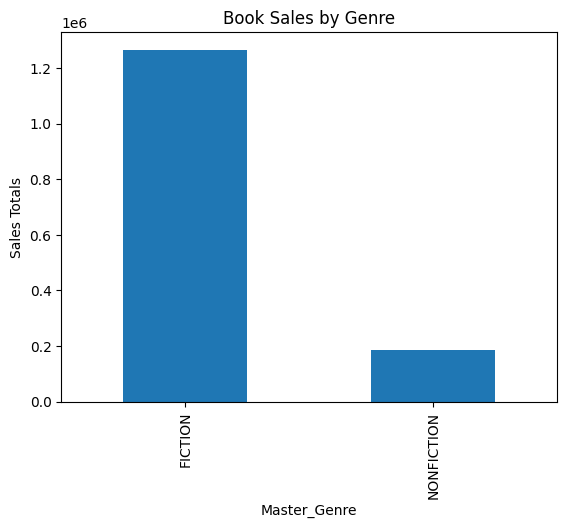

In [ ]:
#grouped_data = df.groupby('Category')['Value'].sum()
sales_grouped_by = Full_Book_Details_modified.groupby('Master_Genre')['gross_sales'].sum()

# Plot the grouped data as a bar chart
sales_grouped_by.plot(kind='bar', title='Book Sales by Genre')
plt.xlabel('Master_Genre')
plt.ylabel('Sales Totals')
plt.show()

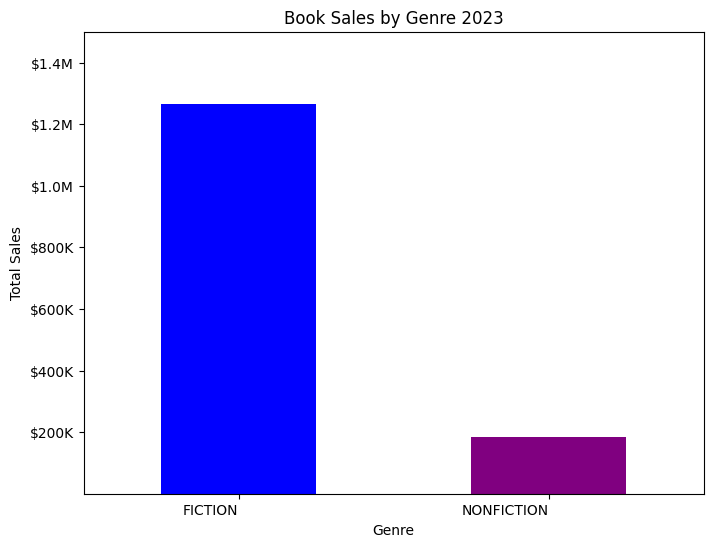

In [73]:
#change orientation of graph and dollar ticks
def currency(x,pos):
    if x >=1e6:
        s = '${:1.1f}M'.format(x*1e-6)
    else:
        s = '${:1.0f}K'.format(x*1e-3)
    return s

fig, ax = plt.subplots(figsize=(8,6))
sales_grouped_by.plot(kind='bar', color=['blue','purple'])
labels = ax.get_xticklabels()
plt.setp(labels,
          rotation = 0,
          horizontalalignment='right')
ax.set(ylim=[10,1500000],
       ylabel='Total Sales', xlabel='Genre',
       title='Book Sales by Genre 2023')
ax.yaxis.set_major_formatter(currency)

plt.savefig('barplot_Maser_Genre_Booksales.png')
plt.show()

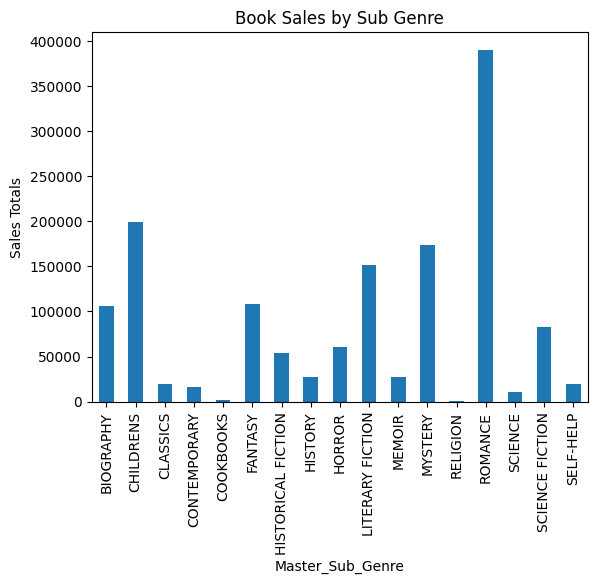

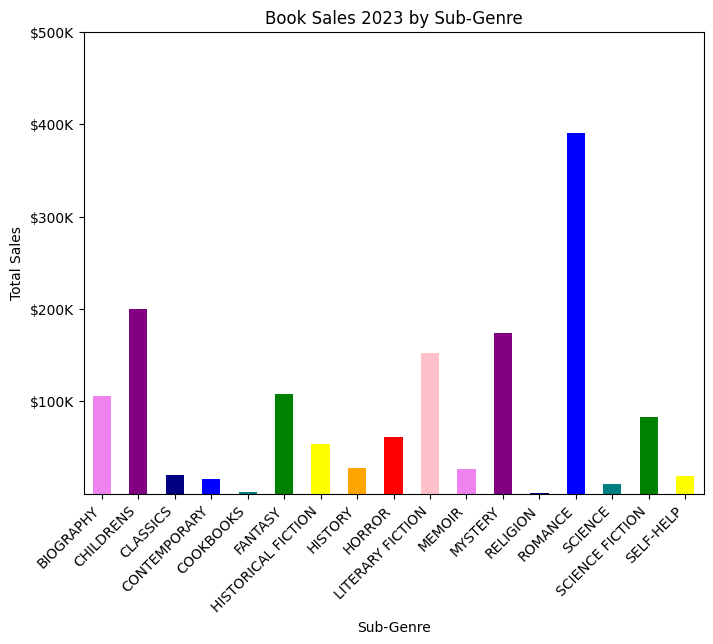

In [81]:
# chart book sales by sub-genre
# #grouped_data = df.groupby('Category')['Value'].sum()
Sub_genres_grouped_by = Full_Book_Details_modified.groupby('Master_Sub_Genre')['gross_sales'].sum()

# Plot the grouped data as a bar chart
Sub_genres_grouped_by.plot(kind='bar', title='Book Sales by Sub Genre')
plt.xlabel('Master_Sub_Genre')
plt.ylabel('Sales Totals')
plt.show()

fig, ax = plt.subplots(figsize=(8,6))
Sub_genres_grouped_by.plot(kind='bar', color=['violet','purple','navy','blue','teal','green','yellow','orange','red','pink'])
labels = ax.get_xticklabels()
plt.setp(labels,
          rotation = 45,
          horizontalalignment='right')
ax.set(ylim=[10,500000],
       ylabel='Total Sales', xlabel='Sub-Genre',
       title='Book Sales 2023 by Sub-Genre')
ax.yaxis.set_major_formatter(currency)

plt.savefig('barplot_2023_Sub_Genre_Booksales.png')
plt.show()

<Axes: xlabel='Master_Genre'>

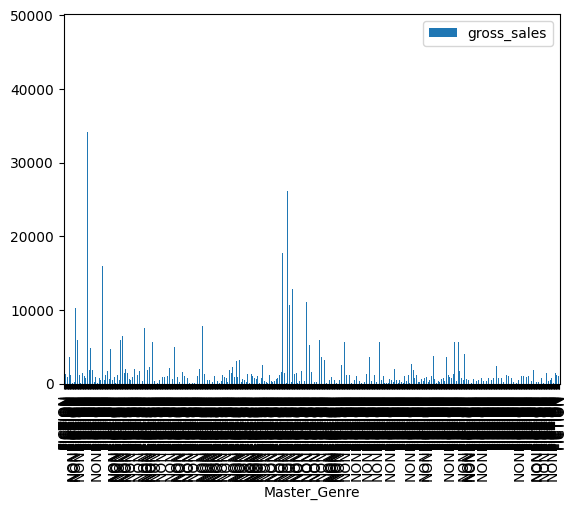

In [47]:
# graph of sales numbers for fiction and non-fiction
Full_Book_Details_modified.plot(x='Master_Genre', y='gross_sales', kind="bar") 
